<a href="https://colab.research.google.com/github/saykim/ds/blob/main/%E2%96%B6%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D_%EC%BD%94%EB%94%A9_%ED%8C%81%E2%97%80_220412_%EC%97%85%EB%8D%B0%EC%9D%B4%ED%8A%B8_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 단어추출 mecab, khaiii

## khaiii

In [ ]:
from collections import Counter
import matplotlib.pyplot as plt
import os
import glob
from khaiii import KhaiiiApi

In [ ]:
list = []
for filename in os.listdir():
    if filename[-3:] == 'txt':
        list.append(filename)
list

In [ ]:
from collections import Counter
import matplotlib.pyplot as plt
import os
import glob
from khaiii import KhaiiiApi

word_list = []
for i in list:
    # 텍스트를 읽음
    q = open(i, "r", encoding='utf=8')
    data = q.read()
    from khaiii import KhaiiiApi
    api = KhaiiiApi()
    for word in api.analyze(data):
        for morph in word.morphs:
            if morph.tag in ['NNG', 'NNP']:
                if morph.length >1 :
                    word_list.append(morph.lex) #리스트를 안만들고 mecab 과 동일한 형식으로 하면 단어가 전부 쪼개짐

    count = Counter(word_list)
    noun_list = count.most_common(200)
    
    for v in noun_list:
        print('해당질문의 단어 빈도수 : {} : '.format(i), v)


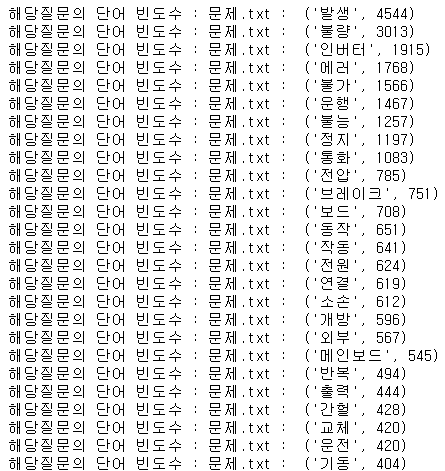

## mecab

In [ ]:
from konlpy.tag import Okt, Mecab, Twitter, Hannanum, Kkma, Komoran
from collections import Counter
import matplotlib.pyplot as plt
import os
import glob

In [ ]:
from konlpy.tag import *
mecab = Mecab()
hannanum = Hannanum()
kkma = Kkma()
komoran = Komoran()
okt = Okt()

In [ ]:
# mecab 형식
list = []
for filename in os.listdir():
    if filename[-3:] == 'txt':
        list.append(filename)
list



# mecab으로
mecab_path = '/mnt/c/mecab/mecab-ko-dic' #mecab 단어 라이브러리 위치 path
for i in list:
    # 텍스트를 읽음
    q = open(i, "r", encoding='utf=8')
    data = q.read()
    # 명사만 추출
    tokenizer = Mecab(dicpath=mecab_path)  # 한글관련 mecab 뭉텅이 위치
    mecab_noun = tokenizer.nouns(data)
    for j, v in enumerate(mecab_noun): #한글자 제외
        if len(v) < 2:
            mecab_noun.pop(j)

    count = Counter(mecab_noun)
    noun_list = count.most_common(200)
#     print('해당질문의 단어 빈도수 : {}'.format(i))
    for v in noun_list:
        print('해당질문의 단어 빈도수 : {} : '.format(i), v)

# 데이터 타입별 분리 하기

In [ ]:
cat_cols = [i for i, t in zip(tmp_train.dtypes.index, tmp_train.dtypes) if t =='O'] #object 만 추출
num_cols = [i for i in tmp_train.dtypes.index if i not in cat_cols]

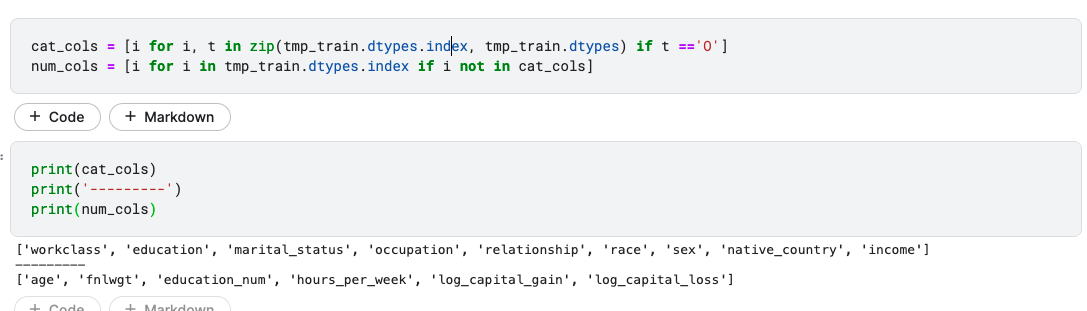

# pandas 

## pd.read_csv, 파라미터

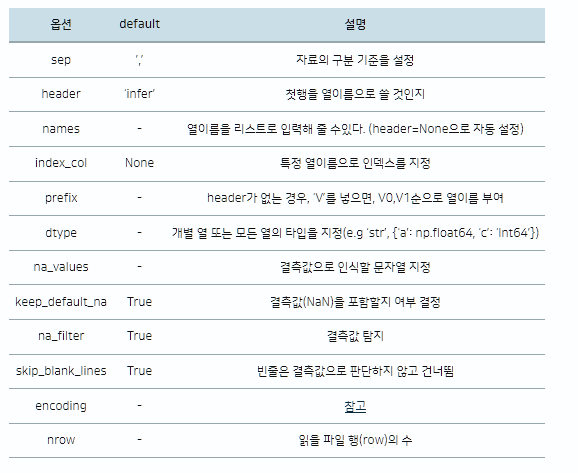

## 시간정보(Datetime) 분리 및 구분

https://m.blog.naver.com/PostView.nhn?blogId=wideeyed&logNo=221603462366&proxyReferer=https:%2F%2Fwww.google.com%2F

In [ ]:
#For time series analysis
data['Date'] = pd.to_datetime(data['Date'])
data['Year'] = data['Date'].apply(lambda x : x.year)
data['Month'] = data['Date'].apply(lambda x : x.month)
data['Day'] = data['Date'].apply(lambda x : x.day)
data['Weekday'] = data['Date'].apply(lambda x : x.day_name())
data.head(3)

In [ ]:
#시간정보를 구분
df['SALE_year'] = [t.year for t in pd.DatetimeIndex(df['SALE DATE'])]
df['SALE_month'] = [t.month for t in pd.DatetimeIndex(df['SALE DATE'])]
df.tail()

In [ ]:
#SALE DATE 정보를 다른 식으로 변환
df['sale_year'] = pd.DatetimeIndex(df['SALE DATE']).year.astype('category')
df['sale_month'] = pd.DatetimeIndex(df['SALE DATE']).month.astype('category')
df.tail()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,sale_year,sale_month
84543,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,B9,37 QUAIL LANE,10309,2,0,2,2400.0,2575.0,1998,1,B9,450000.0,2016-11-28,2016,11
84544,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,B9,32 PHEASANT LANE,10309,2,0,2,2498.0,2377.0,1998,1,B9,550000.0,2017-04-21,2017,4
84545,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,B2,49 PITNEY AVENUE,10309,2,0,2,4000.0,1496.0,1925,1,B2,460000.0,2017-07-05,2017,7
84546,5,WOODROW,22 STORE BUILDINGS,4,7100,28,K6,2730 ARTHUR KILL ROAD,10309,0,7,7,208033.0,64117.0,2001,4,K6,11693337.0,2016-12-21,2016,12
84547,5,WOODROW,35 INDOOR PUBLIC AND CULTURAL FACILITIES,4,7105,679,P9,155 CLAY PIT ROAD,10309,0,1,1,10796.0,2400.0,2006,4,P9,69300.0,2016-10-27,2016,10


## 시간정보, 초로 변경

In [ ]:
seconds = dt / np.timedelta64(1, 's')

## 조건별로 데이터 shift 만들기

In [ ]:
df['shift'] = df.groupby('id')['date'].shift(1, fill_value='')
df.head()

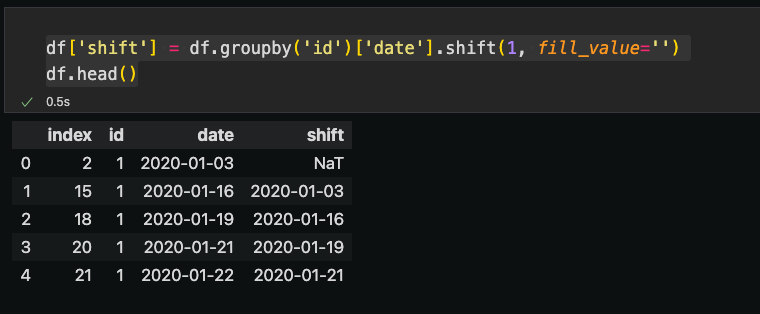

## List comprehension_데이터의 값을 조건별로 변경하는 방법

In [ ]:
look_up = {'1': '01', '2': '02', '3': '03', '4': '04', '5': '05',
            '6': '06', '7': '07', '8': '08', '9': '09', '10':'10', '11':'11', '12':'12'} #전체 값을 다 지정해야 함

install['월'].apply(lambda x :look_up[x])

# 정수를 월로 변경하기 위해 숫자 앞에 0을 붙이는 작업

In [ ]:
특정값을 원하는 값으로 바꾸는 리스트 방법 if, else, for 구문으로 사용

all['인승RISE길이'] = ['13' if i == '13M' else '17' if i == '17L' else i for i in all['인승RISE길이']]

## def, apply, map 특정 조건으로 데이터 특성을 추출하여 별도 특성을 만드는방법
 * seaborn 함수 내 타이타닉 활용

In [ ]:
def multi(df):
    if (df['sex']=='male')&(df['class']=='First'):
        return 'high-class'

df['test'] = df.apply(multi, axis=1)

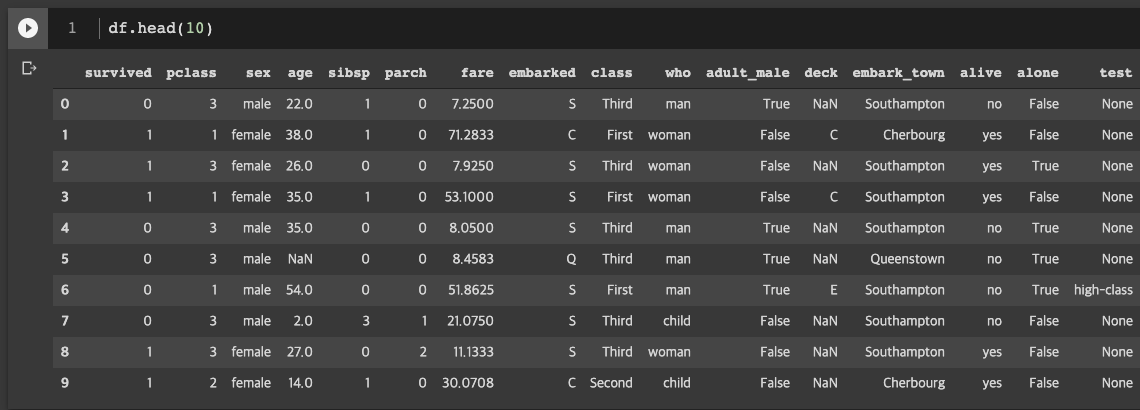

### List Comprehenstion + lambda + apply

In [ ]:
data['age'].apply(lambda x : 'child' if x < 15 else 'young' if 15<x<40 else 'adult').head(100)

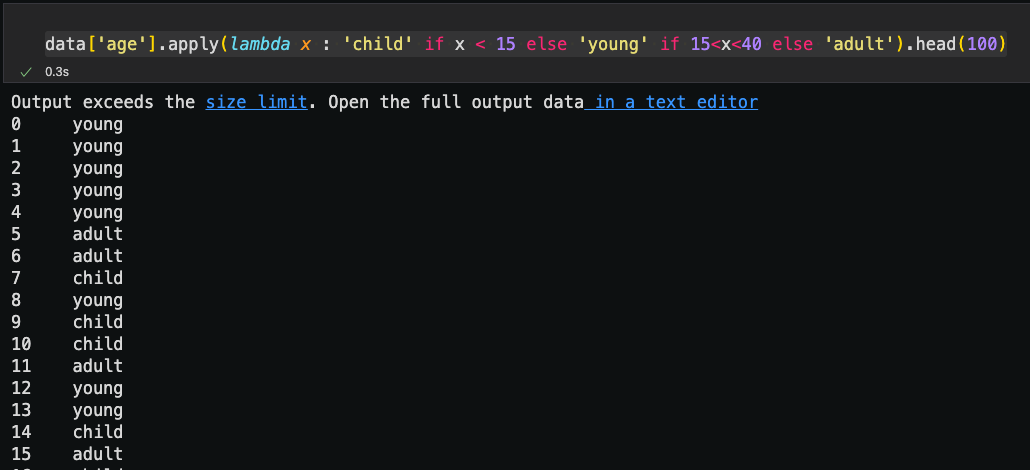

## 특정 열만 추출하는 정규식

In [ ]:
data.filter(regex='Product|W') #특정 열(Columns)을 추출하는 정규식

# Product와 W로 시작하는 열만 추출 

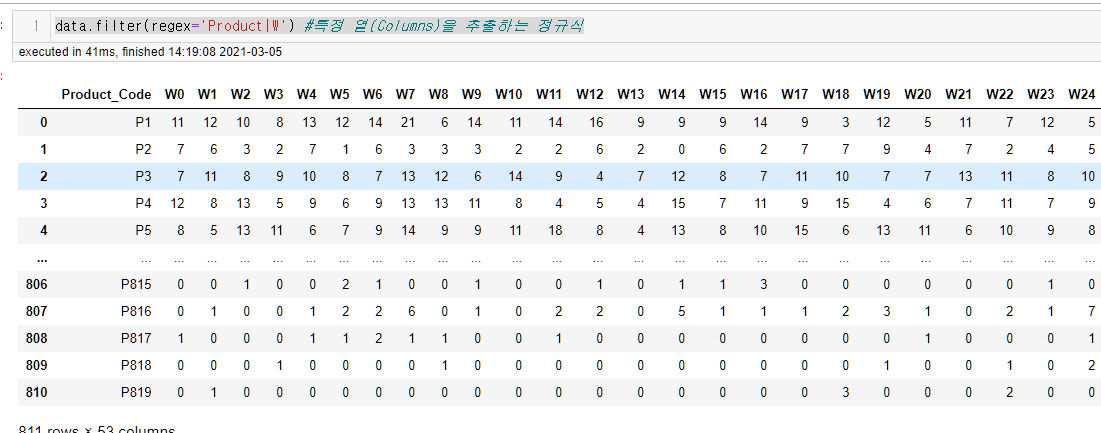

## 특정 조건만 DataFrame에서 추출

In [ ]:
model_group = ['STVF', 'LXVF','SSVF', 'WBSS', 'WBLX']

df_select = df[df['기종그룹'].isin(model_group)] #중복 조건 적용하여 DataFrame 에서 추출

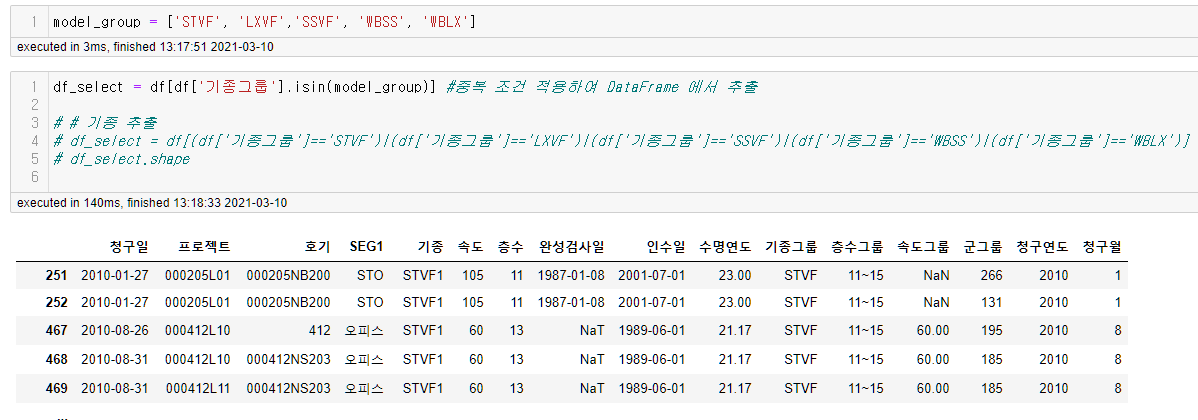

## 조건에 맞는 데이터 컬럼과 값 만들기

In [ ]:
tips['5$'] = ['more 5$' if i >= 5.0 else 'lower 5$' for i in tips['tip'] ]
tips.tail(20)

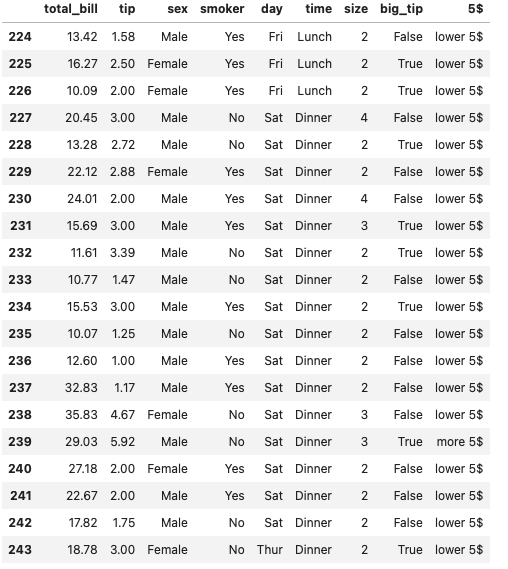

## 원하는 컬럼명을 간단하게 리스트로 만드는 방법



```
[col for col in train.columns if 'take'(원하는컬럼명) in col] #train DataFrame
```



## 이중조건(IF)으로 원하는 조건으로 신규 데이터 생성(열)

In [ ]:
# sns.load_data(tips)기준

# sex가 Male이면서 time이 Lunch 인 것만 추출해서 특정 구분값을 기입하는 이중조건문
a = []
for num, i in enumerate(df['sex']):
    if i == 'Male':
        if df['time'][num] == 'Lunch':
            a.append('man_lunch')
        else:
            a.append('none')
    else:
        a.append('none')
        
df['man_smoker'] = pd.DataFrame(a)


----------------------------------

a = []
for num, i in enumerate(df['sex']):
    if i == 'Male':
        if df['day'][num] == 'Sun':
            a.append('Man with Sunday')
        else : 
            a.append('nope')
    else : 
        a.append('nope')

## 순서대로 list 출력

In [ ]:
col_order = [f's{i}' for i in range(14)] #f's{i}' <-- f 가 주요역할
col_order

['s0',
 's1',
 's2',
 's3',
 's4',
 's5',
 's6',
 's7',
 's8',
 's9',
 's10',
 's11',
 's12',
 's13']

## 작업이 진행되는 시간 표시방법



```
from tqdm import tqdm_notebook
for col in tqdm_notebook( cat_cols ):
```



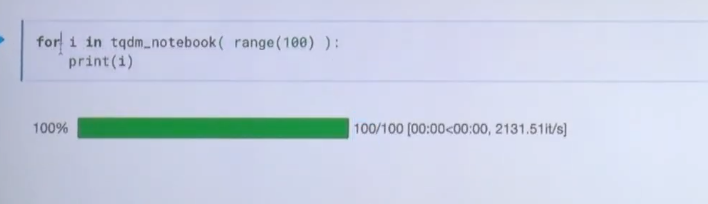

## 데이터 타입별 unique 한 값(value) 확인하기


In [ ]:
app_train.select_dtypes(include='object').apply(pd.Series.nunique, axis=0)
#app_train :dataframe


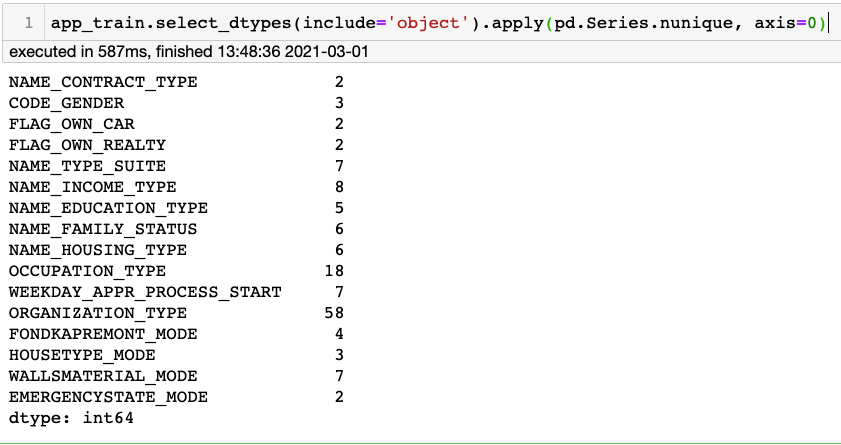

## 실행한 모든 결과 한 결과창에 표시하기


```
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
```



In [ ]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [ ]:
diamonds.tail()
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53939,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


## pandas로 데이터 확인 시 노출되는 범위 지정

> 들여쓴 블록



```
pd.set_option('display.max_columns', 200) #200의 값을 조절하면 노출범위 변경가능
pd.set_option('display.max_rows', 200)
```




```
import pandas as pd
pd.set_option('display.max_rows', None) # 최대 표시 줄 수 제한 해제
pd.set_option('display.max_columns', None) # 최대 표시 컬럼 수 제한 해제
pd.set_option('display.max_colwidth', -1) # 컬럼내 데이터 표시 제한 해제

df = pd.DataFrame(np.random.rand(10, 10))
df.head(10)
```



## pandas에서 표현되는 실수값 정의


```
pd.options.display.float_format = '{:,.0f}'.format
```



## Crosstab 관련

### crosstab, 더하기, 평균

In [ ]:
pd.crosstab(tips['day'], tips['time'], tips['tip'], aggfunc={'mean', 'sum'}).round(2)

mean            sum        
time Lunch Dinner   Lunch  Dinner
day                              
Thur  2.77   3.00  168.83    3.00
Fri   2.38   2.94   16.68   35.28
Sat    NaN   2.99     NaN  260.40
Sun    NaN   3.26     NaN  247.39

### Columns를 이용해 데이터별 상이한 Feature/열/column등을 쉽게 확인하는 방법

```
train_idx = train.columns
test_idx = test.columns

train_idx.difference(test_idx)
```



In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
#corsstab으로 데이터 확인방법

cross_list = ['sex','cp', 'restecg','exang','slope','ca','thal']
for i in cross_list:
  cross = pd.crosstab(df['target'], df[i], margins=True)
  print('target  vs  '+i)
  print(cross)
  print()

target  vs  sex
sex      0    1  All
target              
0       24  114  138
1       72   93  165
All     96  207  303

target  vs  cp
cp        0   1   2   3  All
target                      
0       104   9  18   7  138
1        39  41  69  16  165
All     143  50  87  23  303

target  vs  restecg
restecg    0    1  2  All
target                   
0         79   56  3  138
1         68   96  1  165
All      147  152  4  303

target  vs  exang
exang     0   1  All
target              
0        62  76  138
1       142  23  165
All     204  99  303

target  vs  slope
slope    0    1    2  All
target                   
0       12   91   35  138
1        9   49  107  165
All     21  140  142  303

target  vs  ca
ca        0   1   2   3  4  All
target                         
0        45  44  31  17  1  138
1       130  21   7   3  4  165
All     175  65  38  20  5  303

target  vs  thal
thal    0   1    2    3  All
target                      
0       1  12   36   89  138
1       1   6

In [ ]:
# 예시
train_idx = train.columns
test_idx = test.columns

train_idx.difference(test_idx)

Index(['TARGET'], dtype='object')

## pandas 텍스트 분리

In [ ]:
df2['주소'].str.split(' ')

0             [서울, 동대문, 장안동, 95-1]
1             [서울, 동대문, 장안동, 95-1]
2             [서울, 동대문, 장안동, 95-1]
3             [서울, 동대문, 장안동, 95-1]
4             [서울, 동대문, 장안동, 95-1]
                    ...           
707434        [인천, 서구, 심곡동, 288-4]
707435        [인천, 서구, 심곡동, 288-4]
707436         [경기, 광명시, 철산동, 258]
707437    [서울, 강남구, 신사동, , 569-27]
707438       [대구, 달서구, 두류동, 87-36]
Name: 주소, Length: 707439, dtype: object

> expand를 사용하면 dataframe으로 쉽게 확장해서 반환가능

> n에 원하는 갯수를 입력하면 분할하고자 하는 수를 제한할 수 있다

In [ ]:
df2['주소'].str.split(' ', expand=True, n=1)

,0,1
0,서울,동대문 장안동 95-1
1,서울,동대문 장안동 95-1
2,서울,동대문 장안동 95-1
3,서울,동대문 장안동 95-1
4,서울,동대문 장안동 95-1
...,...,...
707434,인천,서구 심곡동 288-4
707435,인천,서구 심곡동 288-4
707436,경기,광명시 철산동 258
707437,서울,강남구 신사동 569-27


In [ ]:
#분리한 주소를 새로운 컬럼으로 저장
df2[['주소상세1', '주소상세2']] = df2['주소'].str.split(' ', expand=True, n=1)
df2.tail()

,넘버,자재번호,품명,유형,유형2,청구종류,프로젝트,수량,단위,청구번호,...,층수 그룹,속도 그룹,군 그룹,청구종류 구분,수명,주소,청구연도,청구월,주소상세1,주소상세2
707434,111365.0,280090186,"SWITCH ASSY,PLASTIC CARD,FOR CARD KEY,RF",정품,ROH,유상청구,N15960L01,23.0,ST,2000526369,...,1~5,60,263,유상,1.873973,인천 서구 심곡동 288-4,2019,6,인천,서구 심곡동 288-4
707435,111367.0,280090186,"SWITCH ASSY,PLASTIC CARD,FOR CARD KEY,RF",정품,ROH,유상청구,N15960L02,23.0,ST,2000526369,...,1~5,60,263,유상,1.249315,인천 서구 심곡동 288-4,2019,6,인천,서구 심곡동 288-4
707436,111368.0,181100445,"SUBWEIGHT,FC,25kg/EA,CWT BG=1100,WIDTH=1",정품,ROH,수리공사,N15964L01,3.0,EA,2000543291,...,6~10,60,181,유상,4.273973,경기 광명시 철산동 258,2019,7,경기,광명시 철산동 258
707437,48317.0,204100169,단종 PC. BOARD CTB-1 ASSY,수리품,ROH,FM재고소진청구,122640L01,1.0,ST,2000523265,...,1~5,60,204,FM,72.197260,서울 강남구 신사동 569-27,2019,5,서울,강남구 신사동 569-27
707438,111383.0,321104073,"LED LAMP BOARD ASSY,FOR CD199A",정품,ROH,유상청구,N16066L01,1.0,ST,2000546922,...,26~30,105~120,321,유상,2.104110,대구 달서구 두류동 87-36,2019,8,대구,달서구 두류동 87-36


## dataframe 데이터 타입별 구분


```
train.select_dtypes('object').apply(pd.Series.nunique, axis=0)
.select_dtypes('원하는 데이터')
```



In [ ]:
train.select_dtypes('object').apply(pd.Series.nunique, axis=0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

In [ ]:
df_cat = df.select_dtypes(include='object')
df_cat['cut'].value_counts()

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

## DataFrame 데이터구간별 값 생성


In [ ]:
data['Age_band']=0
data.loc[data['Age']<=16,'Age_band']=0
data.loc[(data['Age']>16)&(data['Age']<=32),'Age_band']=1
data.loc[(data['Age']>32)&(data['Age']<=48),'Age_band']=2
data.loc[(data['Age']>48)&(data['Age']<=64),'Age_band']=3
data.loc[data['Age']>64,'Age_band']=4
data.head(2)

# Value_counts() 상위갯수별로 데이터 추출df2_new

In [ ]:
df2['주소대'].value_counts()

서울시             186073
경기도             147478
부산시             53583 
경상남도            39691 
경상북도            35770 
인천시             30455 
대구시             26990 
강원도             26355 
대전시             24985 
울산시             24155 
광주시             23940 
충청남도            21785 
전라북도            21271 
전라남도            16440 
충청북도            13485 
제주도             11586 
제외              1336  
세종시             866   
모름              601   
창원시             311   
개성공업지구          160   
북한              65    
충천북도            19    
러시아             17    
과천시             12    
미팔군내            7     
PHONG105,TOA    3     
Name: 주소대, dtype: int64

In [ ]:
# value_counts() 상위(특정갯수) 이상 되는 것만 추출
m = df2['주소대'].value_counts().head(16).min()
df2_new = df2.groupby('주소대').filter(lambda x : len(x)>=m)

In [ ]:
df2_new['주소대'].value_counts()

서울시     186073
경기도     147478
부산시     53583 
경상남도    39691 
경상북도    35770 
인천시     30455 
대구시     26990 
강원도     26355 
대전시     24985 
울산시     24155 
광주시     23940 
충청남도    21785 
전라북도    21271 
전라남도    16440 
충청북도    13485 
제주도     11586 
Name: 주소대, dtype: int64

# 결손치(isnull) 관련

In [ ]:
# 값이 존재하면 1, 값이 없으면 0
# titanic 'Cabin'의 경우를 예시

Cabin_exist= train['Cabin'].isnull().map({False:1, True:0})



## 결손확률 확인하기

In [ ]:
#간단히 함수로 직접 만들
def missing_table(df):
    miss_v = df.isnull().sum()
    miss_v_per = 100 * miss_v / len(df)
    #make a table
    table = pd.concat([miss_v, miss_v_per], axis=1)
    rename_table = table.rename(columns = {0:'Missing', 1:'% of Total Values'}).sort_values(by='Missing',ascending=False)
    return rename_table


In [ ]:
missing_table(train)

,Missing,% of Total Values
COMMONAREA_MEDI,42784,69.565217
COMMONAREA_AVG,42784,69.565217
COMMONAREA_MODE,42784,69.565217
NONLIVINGAPARTMENTS_MODE,42527,69.147345
NONLIVINGAPARTMENTS_AVG,42527,69.147345
NONLIVINGAPARTMENTS_MEDI,42527,69.147345
LIVINGAPARTMENTS_MODE,41904,68.134370
LIVINGAPARTMENTS_AVG,41904,68.134370
LIVINGAPARTMENTS_MEDI,41904,68.134370
FONDKAPREMONT_MODE,41881,68.096972


### 결손치 데이터(isnull) 값 확인

In [ ]:
df.columns[df.isnull().any()]

Index(['LAND SQUARE FEET', 'GROSS SQUARE FEET', 'SALE PRICE'], dtype='object')

### 결손데이터 변경 replace 사용

In [ ]:
df.replace(' ',np.NaN, inplace=True)

### 중복 데이터 제거 내장함수

In [ ]:
sum(df.duplicated(df.columns))
#중복 데이터를 제거

765

In [ ]:
#중복데이터를 제거하는 일반적인 방법, 마지막을 유지
df = df.drop_duplicates(df.columns, keep='last')
sum(df.duplicated(df.columns))


0

# 최빈값으로 결측치 데이터 채워넣기

In [ ]:
#최빈값으로 값 적용
na_cols = ['workclass', 'occupation', 'native_country']

for i in na_cols:
    tmp_train.loc[train[i] == '?', i] = train[i].mode()[0]
    tmp_test.loc[test[i] == '?', i] = test[i].mode()[0]


# .loc를 적용해서 ? 값에 최빈값 적용
# tmp_train은 초기이에 train을 복사해서 사용해서 그러함


# 데이터 구간별 컬럼(특성)값 적용

In [ ]:
def month_quarter_Conversion(x):
    if x in [10, 11, 12]:
        season = 'Fourth'
    elif x in [1, 2, 3]:
        season = 'First'
    elif x in [4, 5, 6]:
        season = 'Second'
    elif x in [7, 8, 9]:
        season = 'Third'
    return season

data['Quarter'] = data['Month'].apply(month_quarter_Conversion)
data.tail(3)

# 10, 11, 12 은 Fourth로 구간값적용
# 1,2,3, 값은 data['Quater'] 컬럼에 First 값으로 적용

# groupby 기능 예시

```
train.groupby([ 'Sex','Pclass'])['Age'].mean()

Sex     Pclass
female  1         34.611765
        2         28.722973
        3         21.750000
male    1         41.281386
        2         30.740707
        3         26.507589
Name: Age, dtype: float64
    
```



## 조건으로 groupby 기능 예시

```
train.groupby(train['Cabin'].isnull()==True)['Survived'].mean()

Cabin
False    0.666667
True     0.299854
Name: Survived, dtype: float64
```

## groupby + transform : 조건별(Groupby) 부분합 구하기

In [ ]:
df["total_passengers"] = df.groupby("year")["passengers"].transform(sum)

df.head(10)


#groupby와 transform 함수를 동시에 활용하여 총 합계 변수를 만들어보자.
#transfrom() 괄호 안에 적용할 함수를 넣어주면 되는데 합계 함수는 sum 기본 함수를 사용하면 된다. 

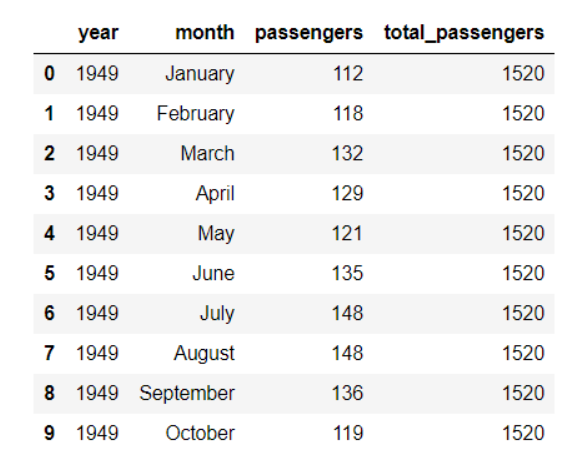

In [ ]:
train.groupby(['Sex', 'Pclass'])['Age'].mean()

Sex     Pclass
female  1         34.611765
        2         28.722973
        3         21.750000
male    1         41.281386
        2         30.740707
        3         26.507589
Name: Age, dtype: float64

# 데이터 타입(type) 변환 방법

## 숫자 정보 시간정보(연, 월)로 변경 후 월 이름으로 변경

In [ ]:
look_up = {'1': '01', '2': '02', '3': '03', '4': '04', '5': '05',
            '6': '06', '7': '07', '8': '08', '9': '09', '10':'10', '11':'11', '12':'12'} #전체 값을 다 지정해야 함

install['월'].apply(lambda x :look_up[x])

# df['Month'] = df['Month'].apply(lambda x: look_up[x])

#앞에 0 이 없는 숫자에 0을 추가하는 방법

In [ ]:
import calendar
calendar.month_abbr[1]

'Jan'

In [ ]:
install['월'].apply(lambda x :calendar.month_abbr[x] )

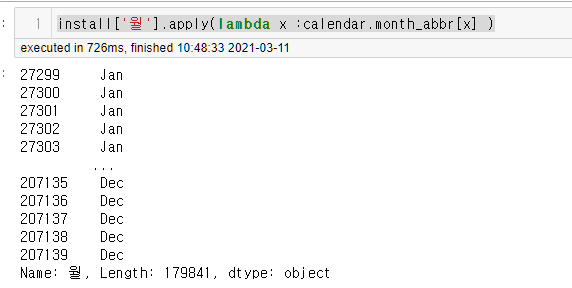

## int 데이터를 numeric 으로 '강제' 변환



```
pre_sale['분양가격'] = pd.to_numeric(pre_sale_price, errors='coerce')
```



## 데이터 타입 변환

In [ ]:
df['BOROUGH'] = df['BOROUGH'].astype('category')
df['TAX CLASS AT TIME OF SALE'] = df['TAX CLASS AT TIME OF SALE'].astype('category')
df['TAX CLASS AT PRESENT'] = df['TAX CLASS AT PRESENT'].astype('category')
df['LAND SQUARE FEET'] = pd.to_numeric(df['LAND SQUARE FEET'], errors='coerce')
df['GROSS SQUARE FEET']= pd.to_numeric(df['GROSS SQUARE FEET'], errors='coerce')
df['SALE PRICE'] = pd.to_numeric(df['SALE PRICE'], errors='coerce')
df['SALE DATE'] = pd.to_datetime(df['SALE DATE'], errors='coerce')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   BOROUGH                         84548 non-null  category      
 1   NEIGHBORHOOD                    84548 non-null  object        
 2   BUILDING CLASS CATEGORY         84548 non-null  object        
 3   TAX CLASS AT PRESENT            84548 non-null  category      
 4   BLOCK                           84548 non-null  int64         
 5   LOT                             84548 non-null  int64         
 6   BUILDING CLASS AT PRESENT       84548 non-null  object        
 7   ADDRESS                         84548 non-null  object        
 8   ZIP CODE                        84548 non-null  int64         
 9   RESIDENTIAL UNITS               84548 non-null  int64         
 10  COMMERCIAL UNITS                84548 non-null  int64         
 11  TO

## object 데이터를 numeric으로 변경

In [ ]:
data_features['기종_설치대수'] = data_features['기종_설치대수'].str.replace(',','').astype(int)
data_features['당해기종_설치대수'] = data_features['당해기종_설치대수'].str.replace(',','').astype(int)
data_features['기종인승_설치대수'] = data_features['기종인승_설치대수'].str.replace(',','').astype(int)
data_features['당해기종인승_설치대수'] = data_features['당해기종인승_설치대수'].str.replace(',','').astype(int)
data_features['기종별사고ppm'] = data_features['기종별사고ppm'].str.replace(',','').astype(int)
data_features['기종인승별사고ppm'] = data_features['기종인승별사고ppm'].str.replace(',','').astype(int)
data_features['연도별기종사고ppm'] = data_features['연도별기종사고ppm'].str.replace(',','').astype(int)

## 데이터프레임 전체를 숫자타입으로 변경

In [ ]:
df = df.apply(pd.to_numeric, errors='coerce').fillna(0)

df

# apply 함수로 데이터프레임 전체에 to_numeric 함수를 적용해주었기 때문에 단 한 줄로 전체 값들이 숫자로 잘 변환되었다. 
# 여기서도 그대로 에러값들은 NaN으로 변경하고 fillna를 0으로 처리한다는 것까지 그대로 한줄안에 포함되었다. 

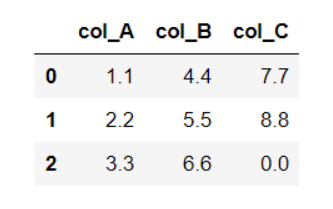

## 숫자 데이터로 변환

In [ ]:
data_features['경력(월)'] = data_features['경력(월)'].astype('float32')

## describe 전체 데이터 보기


```
pre_sale.describe(include='all')
```



## object만 보기

```
pre_sale.describe(include=[np.object])

```




In [ ]:
pre_sale.describe(include=[np.object])

,지역명,규모구분,연도,월,분양가격(㎡)
count,2805,2805,2805,2805,2674
unique,17,5,4,12,1278
top,경남,전용면적 85㎡초과 102㎡이하,2017,2,2221
freq,165,561,1020,255,17


# 정규식(regular expression)

https://docs.python.org/ko/3/library/re.html

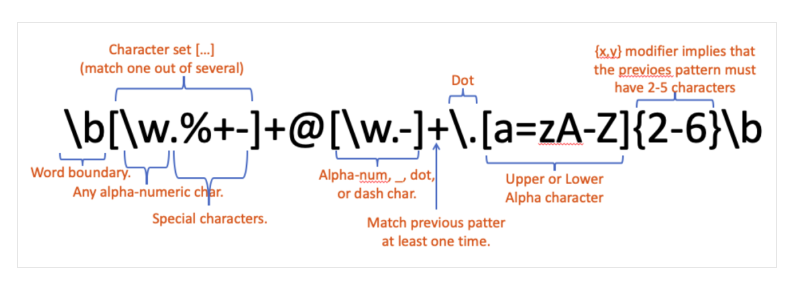

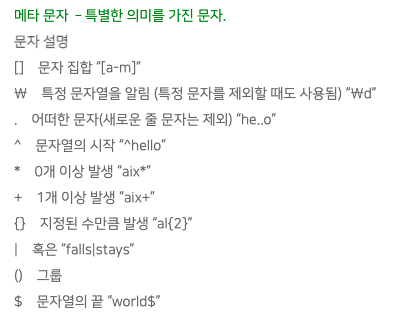

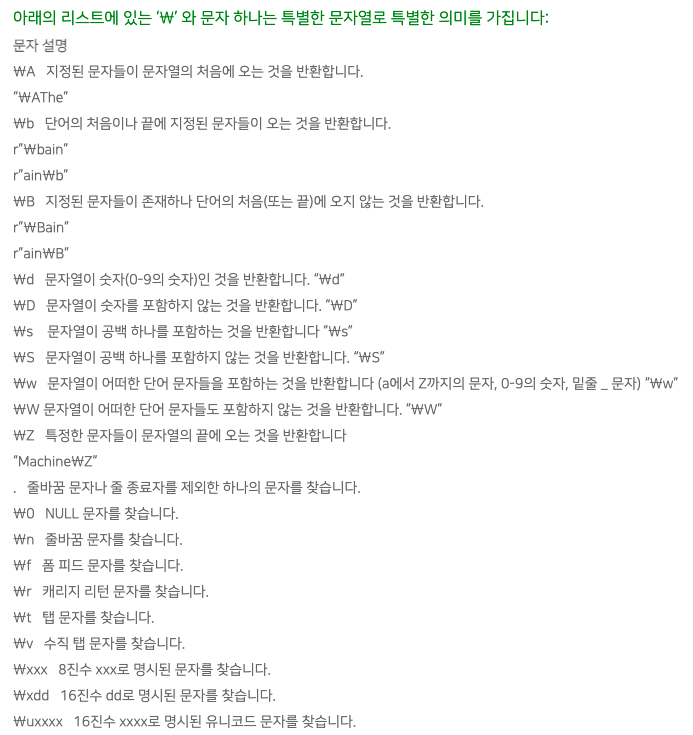

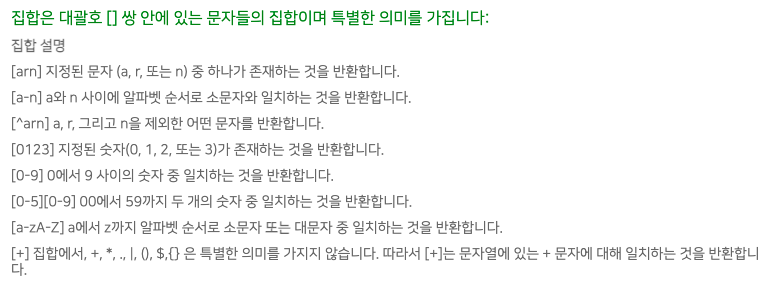

### 문자 뒤 숫자 만 추출 정규식

In [ ]:
df['TotalCharges'].str.extract('(\d+\.?\d+)') #소수점 출력

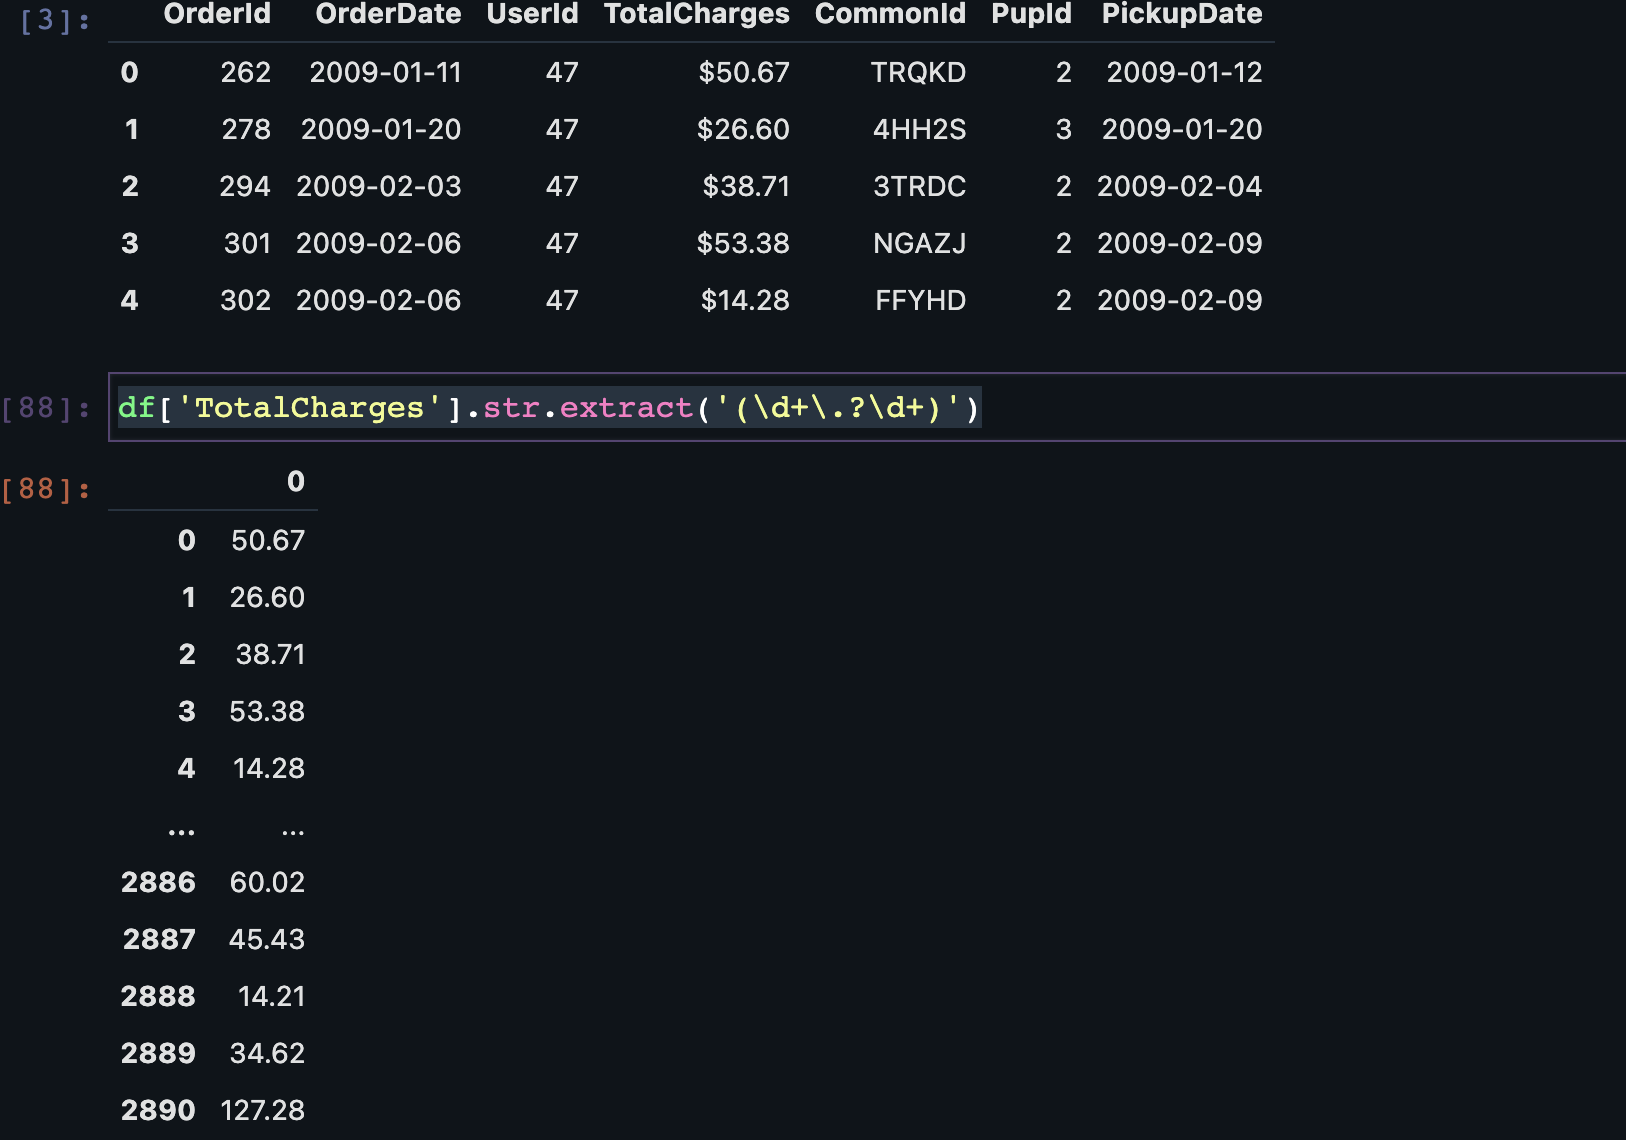

In [ ]:
auto.loc[auto['horsepower'].isnull()==True]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
32,25.0,4,98.0,NaN,2046,19.0,71,usa,ford pinto
126,21.0,6,200.0,NaN,2875,17.0,74,usa,ford maverick
330,40.9,4,85.0,NaN,1835,17.3,80,europe,renault lecar deluxe
336,23.6,4,140.0,NaN,2905,14.3,80,usa,ford mustang cobra
354,34.5,4,100.0,NaN,2320,15.8,81,europe,renault 18i
374,23.0,4,151.0,NaN,3035,20.5,82,usa,amc concord dl


In [ ]:
#특정 셀에서 특정 문구만 추출
import re
stringA = auto['name'][1]
# re.findall("[a-z]+\s", stringA)
a = re.search("^[a-z]*", stringA).group(0)
type(a)
#정규식으로 추출하는 방법 안책임에게 문의 필요

In [ ]:
df2['용량'] = df2['용량'].apply(lambda x : re.findall('\d+', x))

In [ ]:
x = 'INVERTER,HIVD 700SS, 900GT,15KW 보수자재'
y = re.findall('\S+KW', x) #K
print(y)
#쉼표 앞 문자를 제외한 kw앞 숫자만


def kw_inverter(x):
    return re.findall('\d+KW', str(x))



all_df['인버터용량'] = all_df['품명'].apply(lambda x : kw_inverter(x))

In [ ]:
auto['name'].str.extract('(^[a-z]*)') #정규식으로 추출

,0
0,chevrolet
1,buick
2,plymouth
3,amc
4,ford
...,...
393,ford
394,vw
395,dodge
396,ford


In [ ]:
auto['oem'] = auto['name'].str.split(" ", expand=True)[[0]] #정규식 대신 split함수로 사용가능

In [ ]:
auto.tail()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,oem
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl,ford
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup,vw
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage,dodge
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger,ford
397,31.0,4,119.0,82.0,2720,19.4,82,usa,chevy s-10,chevy


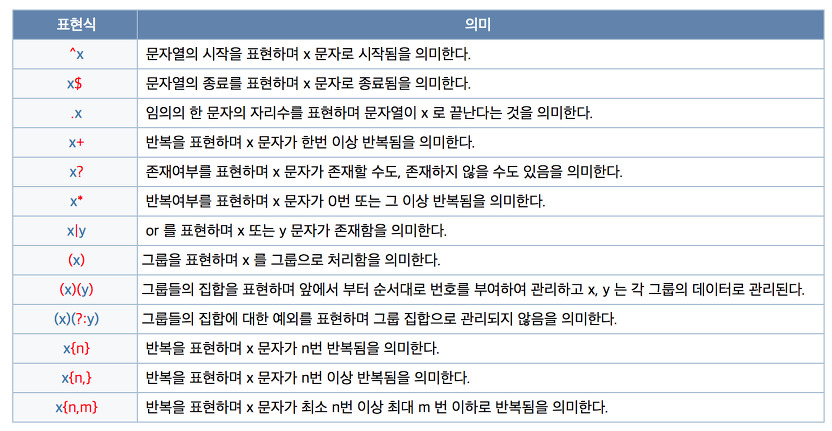

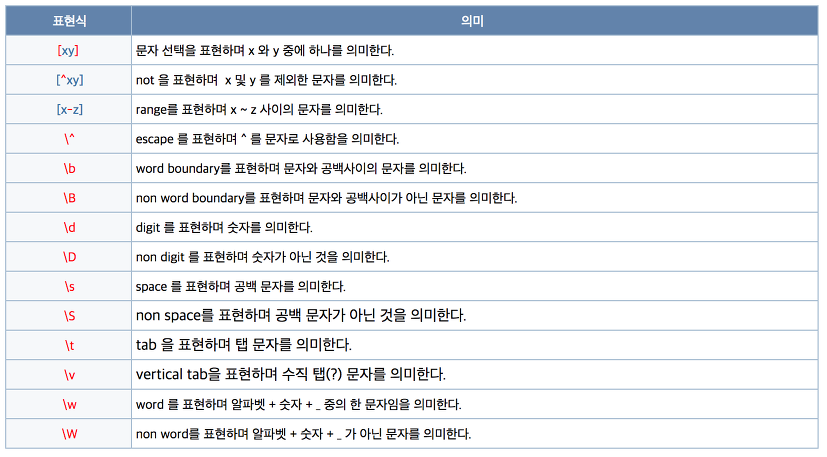

## 괄호 및 특수문자 포함한 사이 글자 지우기

In [ ]:
import re

#괄호 혹은 특수 문자를 포함하여 사이에 있는 글자 까지 모두 지울 수 있는 방법입니다.

#괄호 안의 경우

remove_text = 'asdf(asdf)'

print(re.sub(r'\([^)]*\)', '', remove_text))

# 출력 결과 : 'asdf'

 
'''
위의 \( \) 값 대신에 다른 특수문자를 사용해서 지워도 됩니다

예) <, > 안의 글자 지우기 

re.sub(r'\<[^)]*\>', '', remove_text)
'''

https://hatpub.tistory.com/84

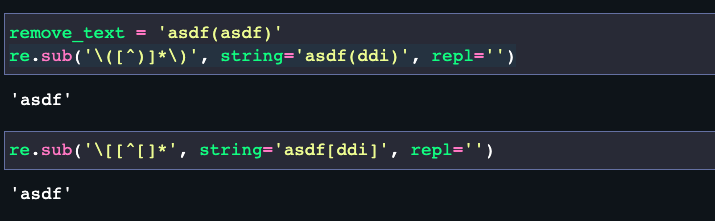

## 실수만 추출

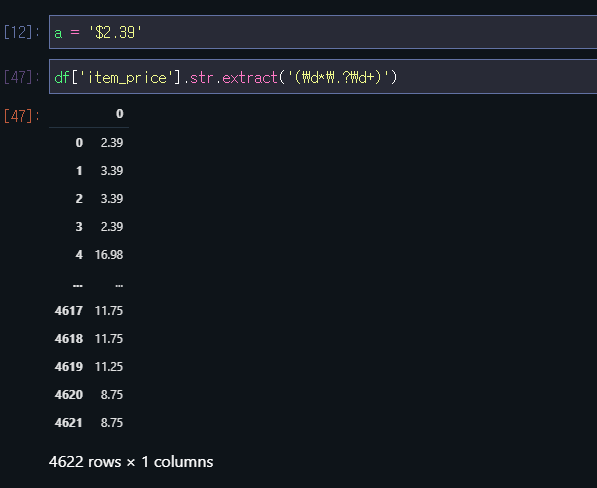

https://m.blog.naver.com/PostView.naver?isHttpsRedirect=true&blogId=pjt3591oo&logNo=220927600515

### 영어+숫자_숫자 중 뒷 숫자만 추출

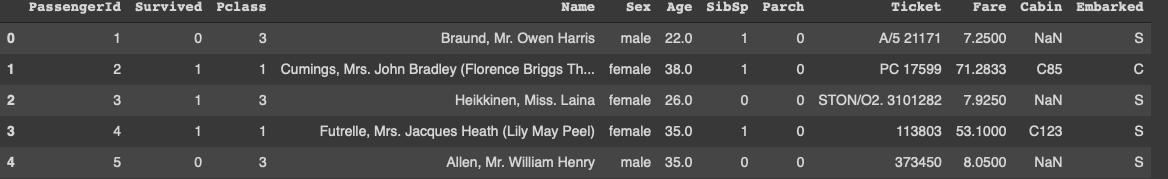

In [ ]:
df_train['Ticket'].str.extract('( +[\d]+)')

# ( +[\d]+) 주우에 앞에 '한칸띄고 +는 앞에 공백 이후 숫자를 추출
# 이렇게 하면 앞에 공백이 없는 데이터는 NaN값으로 추출

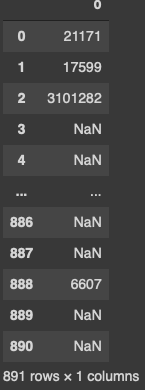

In [ ]:
# Ticket의 뒷 숫자만 추출하기 위해서는 $를 써야함

df_train['Ticket'].str.extract('([0-9]+$)')

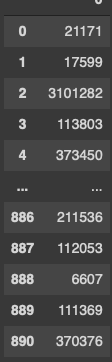

## 알파벳, 쉼표, 공백을 제외한 모든 것을 제외 정규식

 [Fresh Tomato Salsa, [Fajita Vegetables, Rice, Black Beans, Cheese, Sour Cream, Guacamole, Lettuce]]  

In [ ]:
num=0
for i in df['choice_description'] :
    df['choice_description'][num]=re.sub(pattern='[^a-zA-Z, ]',repl='',string=i)
    #[^a-zA-Z,] 은 알파벳과 ',' 그리고 공백을 제외하고 모두 지우겠다는 의미.
    num+=1
df

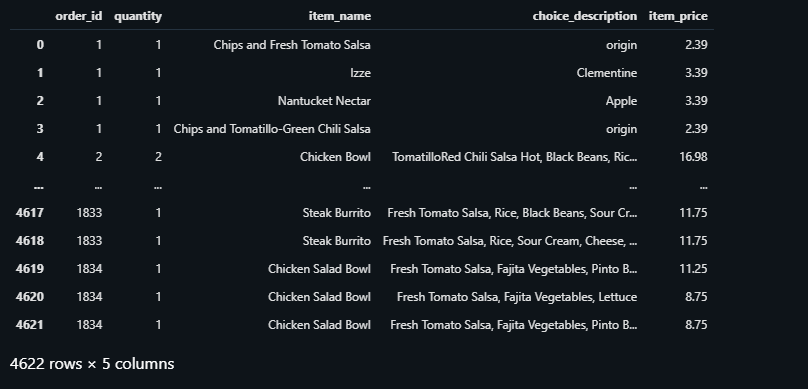

## 정규식, str등 데이터 나누기, 추출하기

### 문자열 나눠서 첫번째 자리에 대입하기



```
for dataset in train_test_data:
    dataset['Cabin'] = dataset['Cabin'].str[:1]
```



In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fsize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


### pandas 내 데이터(텍스트) 나눠서 추출

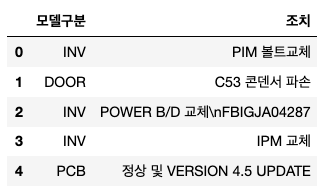

In [ ]:
df3.query("모델구분=='INV'")['조치'].str.split(' ').str[0]

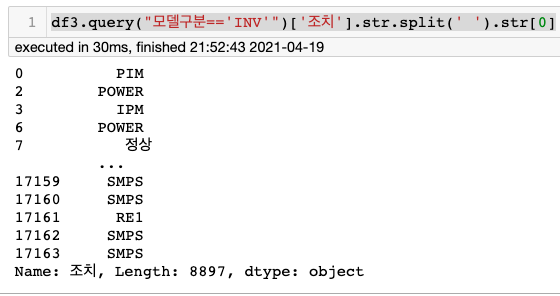

###pandas Query 리스트(list) 사용하기

In [ ]:
repair_df.query("자재군그룹.isin(@material_list)").pivot_table(index='전기기종', columns='년도',
                                                          values='수명year', aggfunc=['mean'], fill_value='', margins=True)

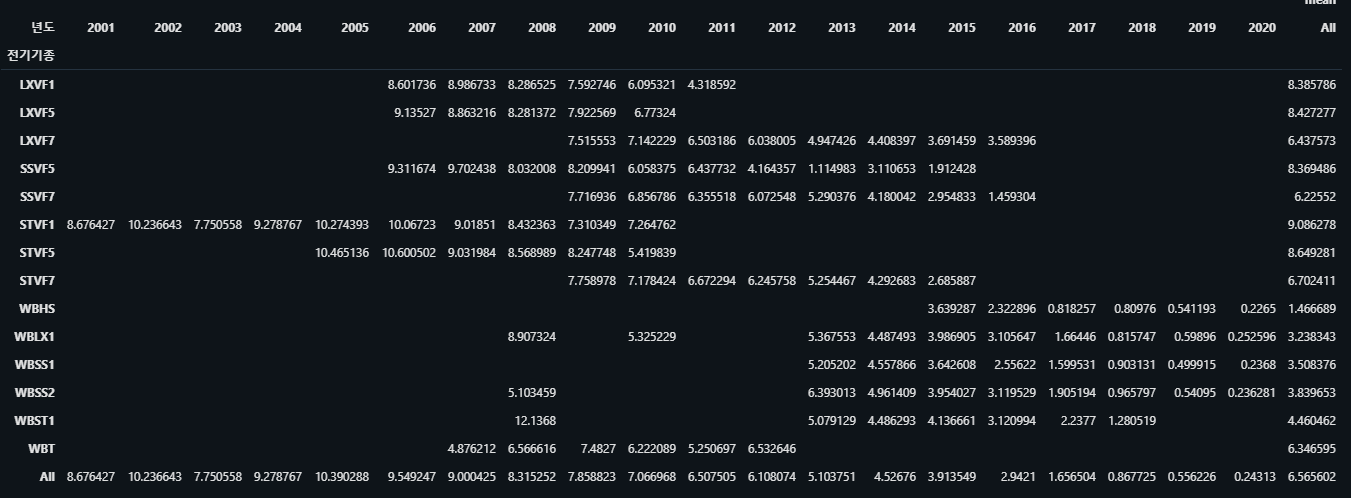

### pandas 내 데이터 추출하여 특정값만 정규식을 추출

In [ ]:
def kw_inverter(x):
    return re.findall('\d+KW', str(x))



all_df['인버터용량'] = all_df['품명'].apply(lambda x : kw_inverter(x))



['900GT,15KW']

### 데이터 값중 0 값만 확인 iter

```
for i in ['x', 'y', 'z']:
    a = (df[i]==0).sum()
    print(i, a)
```



In [ ]:
for i in ['x', 'y', 'z']:
    a = (df[i]==0).sum()
    print(i, a)

x 8
y 7
z 20


### 정규식이용해서 데이터 값 추출하기

In [ ]:
import re
x = 'SMPS B/D 교체\nFBJGA32633\nGATE BD 교체\nGTWJ19390...'
y = re.findall('\S+[A-Z]\W', x) #K
print(y)

['SMPS ', 'B/D ', 'GATE ', 'BD ']


In [ ]:
import re
x = 'SMPS B/D 교체\nFBJGA32633\nGATE BD 교체\nGTWJ19390...'
y = re.findall('\S+[A-Z]', x) #K
print(y)

['SMPS', 'B/D', 'FBJGA', 'GATE', 'BD', 'GTWJ']


In [ ]:
import re
x = 'POWER B/D 교체\nFBIGA04297'
y = re.findall('\S[가-힣]', x) #K
print(y)

['교체']


In [ ]:
x = 'INVERTER,HIVD 700SS, 900GT,15KW 보수자재'
y = re.findall('\S+KW', x) #K
print(y)
#쉼표 앞 문자를 제외한 kw앞 숫자만


def kw_inverter(x):
    return re.findall('\d+KW', str(x))



all_df['인버터용량'] = all_df['품명'].apply(lambda x : kw_inverter(x))

# ML and Deep

## RNN, LSTM 시계열 데이터 Training/Test 나누는 Functin

In [ ]:
def univariate_data(dataset, start_index, end_index, history_size, target_size):
    data = []
    labels = []

    start_index = start_index + history_size
    if end_index is None:
        end_index = len(dataset) - target_size

    for i in range(start_index, end_index):
        indices = range(i-history_size, i)
        data.append(np.reshape(dataset[indices], (history_size, 1)))
        labels.append(dataset[i+target_size])
    return np.array(data), np.array(labels)

TRAIN_SPLIT = 300000
tf.random.set_seed(13)

In [ ]:
univariate_past_history = 20
univariate_future_target = 0

x_train_uni, y_train_uni = univariate_data(
    uni_data, 0, TRAIN_SPLIT, univariate_past_history, univariate_future_target)
x_val_uni, y_val_uni = univariate_data(
    uni_data, TRAIN_SPLIT, None, univariate_past_history, univariate_future_target)

## 원핫인코딩 manual

In [ ]:
origin = dataset.pop('Origin')

dataset['USA'] = (origin == 1)*1.0
dataset['Europe'] = (origin == 2)*1.0
dataset['Japan'] = (origin == 3)*1.0
dataset.tail()

## 아웃라이어(outlier) 제거  함수

In [ ]:
def outlier(var):
    a = []
    q1 = df[var].quantile(.25)
    q2 = df[var].quantile(.5)
    q3 = df[var].quantile(.75)
    iqr = q3 - q1
    ulim = float(q3+(1.5*iqr))
    llim = float(q1-(1.5*iqr))

    for i in df[var]:
        if i > ulim:
            i=np.NaN
        elif i < llim:
            i=np.NaN
        else:
            i=i
        a.append(i)
    return a
for col in df.select_dtypes(exclude='object').columns:
    df[col] = outlier(col)
    

## Scikit-Learn 팁

### LabelEncoder apply를 이용해 간단히 적용

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()
df = df.apply(le.fit_transform) # LabelEncoder 간단히 적용
df.tail()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
8119,0,3,2,4,0,5,0,0,0,11,0,0,2,2,5,5,0,1,1,4,0,1,2
8120,0,5,2,4,0,5,0,0,0,11,0,0,2,2,5,5,0,0,1,4,0,4,2
8121,0,2,2,4,0,5,0,0,0,5,0,0,2,2,5,5,0,1,1,4,0,1,2
8122,1,3,3,4,0,8,1,0,1,0,1,0,2,1,7,7,0,2,1,0,7,4,2
8123,0,5,2,4,0,5,0,0,0,11,0,0,2,2,5,5,0,1,1,4,4,1,2


## Feature importance

In [ ]:
sorted_idx = rfr.feature_importances_.argsort()

plt.figure(figsize=(12,8))
plt.barh(X_train.columns, rfr.feature_importances_[sorted_idx], align='center')
plt.xlabel('Features Importance', size=15)
plt.ylabel('Featrues', size=15)

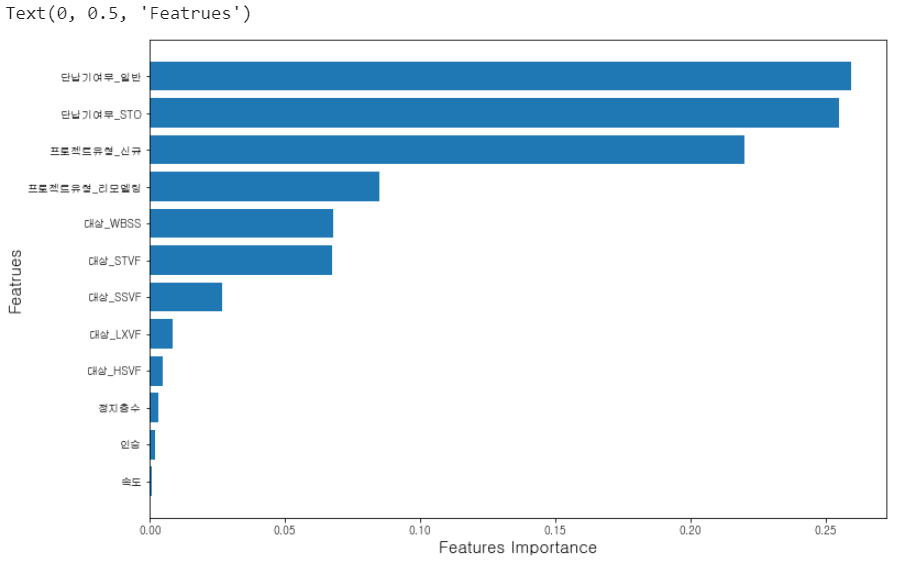

## lightgbm feature importance

In [ ]:
feature_imp = pd.DataFrame(sorted(zip(lgm.feature_importances_,X1_test.columns)), columns=['Value','Feature'])

plt.figure(figsize=(20, 10))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('LightGBM Features (avg over folds)')
plt.tight_layout()
plt.show()
plt.savefig('lgbm_importances-01.png')

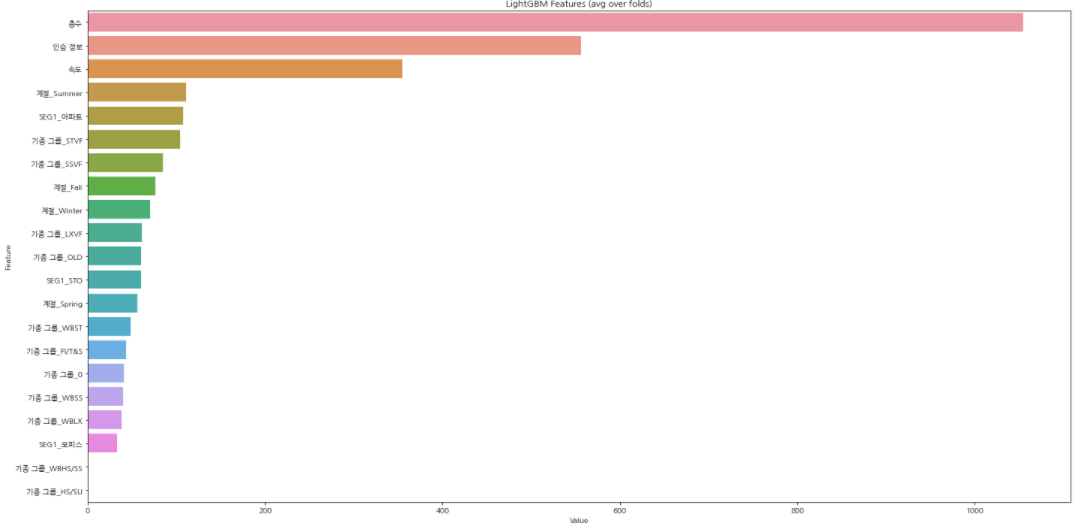